# Hopf bifurcation in a feedback-control system

Consider the following nonlinear differential equation depending on positive parameters $(\alpha, \beta)$:

$$
\frac{d^3 y}{dt^3} + \alpha \frac{d^2 y}{dt} + \beta \frac{dy}{dt} + y(1-y) = 0,
$$

which describes a simple feedback contral system of Lur'e type. By introducing
$x_0=y, x_1 = \dot x_0,$ and $x_2 = \dot x_1$, we can rewrite the equation as the equivalent
third-order system

$$
\tag{1}
\begin{cases}
\dot x_0 &= x_1, \\
\dot x_1 &= x_2, \\
\dot x_2 &= -\alpha x_2 - \beta x_1 + x_0 + x_0^2. \\
\end{cases}
$$

## Linear analysis

For all values of $(\alpha, \beta)$, system (5.40) has two equilibria $x^{(0)} = (0,0,0)$ and
$x^{(1)} = (1,0,0)$. We will analyze the equilibrium at the origin. Frist we import the sympy library and define the system

In [1]:
from sympy import *

var('alpha, beta', real=True, positive=True)
def F(x):
    return Matrix([x[1], x[2], -alpha*x[2]-beta*x[1]-x[0]+x[0]**2])

# show the system
x = symbols('x:3')
F(x)

Matrix([
[                              x1],
[                              x2],
[-alpha*x2 - beta*x1 + x0**2 - x0]])

The Jacobian matrix of (1) evaluated at $x^{(0)}$ has the form

In [2]:
J = F(x).jacobian(x).subs(dict(zip(x,[0,0,0])))
J

Matrix([
[ 0,     1,      0],
[ 0,     0,      1],
[-1, -beta, -alpha]])

The characteristic polynomial of $J$ is given by

In [3]:
J.charpoly()

PurePoly(lambda**3 + alpha*lambda**2 + beta*lambda + 1, lambda, domain='ZZ[alpha,beta]')

To find parameters $\alpha$ and $\beta$ corresponding to purely imaginary of $x^{(0)}$ we substitude $\lambda = i\omega$ into the last equation.

In [4]:
var('omega', real=True, positive=True)
(J.charpoly())(I*omega)

-alpha*omega**2 + I*beta*omega - I*omega**3 + 1

Solving the last equation for $(\alpha, \beta)$ yields

In [5]:
sol = solve((J.charpoly())(I*omega), alpha, beta)
pprint(sol)

⎧   1       2⎫
⎪α: ──, β: ω ⎪
⎨    2       ⎬
⎪   ω        ⎪
⎩            ⎭


Therefore, a necessary condition for the characterictic equation to have purely imaginary roots $\lambda_{1,2} = \pm i\omega$ is

\begin{equation}
    \tag{2}
    \alpha = \alpha_0(\beta) = \dfrac1 \beta, \beta>0.
\end{equation}

It is easy to check that the origin is stable if $\alpha>\alpha_0$ and unstable if $\alpha<\alpha_0$. The transition is caused by a simple pair of complex-conjugate eigenvalues crossing the imaginary axis at $\lambda = \pm i \omega$ where

$$
\omega^2 = \beta.
$$

The velocity of the crossing is nonzero and the third eigenvalue $\lambda_3$ remains
negative for nearby parameter values. Thus, a Hopf bifurcation takes place.
In order to analyze the bifurcation (i.e., to determine the direction of the limit
cycle bifurcation), we have to compute the first Lyapunov coefficient $l_1(0)$ of
the restricted system on the center manifold at the critical parameter values.
If $l_1(0) < 0$, the bifurcation is supercritical and a unique stable limit cycle
bifurcates from the origin for $\alpha<\alpha_0(\beta)$. As we shall see, this is indeed the
case in system (1).
Therefore, fix $\alpha$ at its critical value $\alpha_0$ given by (2) and leave $\beta$ free
to vary. Notice that the elements of the Jacobian matrix at the Hopf bifurcation are rational 
functions of $\omega^2$:

In [6]:
A = J.subs(sol)
A

Matrix([
[ 0,         1,           0],
[ 0,         0,           1],
[-1, -omega**2, -1/omega**2]])

### Eigenvectors

Next we select the eigenvectors from $A$ such that

$$
Aq=i\omega q, \qquad A^T p = -i \omega p
$$

hold.

In [7]:
q = -omega**2*A.eigenvects()[2][2][0]
p = -omega**2*A.H.eigenvects()[1][2][0]
p = simplify(p)

# display p and q
from IPython.display import display, Latex
result = "$$q = {}, \qquad p={}.$$".format(latex(q), latex(p))
display(Latex(result))

<IPython.core.display.Latex object>

Here we scaled the eigenvectors such that they agree with the book. In order to achieve the normalization $\langle p, q \rangle = 1$ we scale the left eigenvector $p$

In [8]:
c = simplify(1/(p.dot(q, hermitian=True))).conjugate()
p = simplify(c*p)
simplify(p.dot(q, hermitian=True))

1

The linear part of the analysis is now complete.

##  Nonlinear analysis

The linear part of the analysis is now complete.
There is only one nonlinear (quadratic) term in (1). Therefore, the
bilinear function $B(v_0,v_1)$, defined for two vectors $v_0 = (v_{00}, v_{01}, v_{02})^T \in \mathbb R^3$ and
$v_0 = (v_{10}, v_{11}, v_{12})^T \in \mathbb R^3$, can be expressed as

In [9]:
v = Matrix(symbols('v:3:3'))
v = transpose(v.reshape(3,3))

DF1 = F(x).jacobian(x)
DF2 = (DF1*v[:,0]).jacobian(x)*v[:,1]
DF3 = DF2.jacobian(x)*v[:,2]

def B(v0,v1):
    d0 = dict(zip(v[:,0], v0))
    d1 = dict(zip(v[:,1], v1))
    return DF2.subs(d0).subs(d1)

B(v[:,0], v[:,1])

Matrix([
[        0],
[        0],
[2*v00*v10]])

while $C(v_0,v_1,v_2) \equiv 0$ 

In [10]:
DF3

Matrix([
[0],
[0],
[0]])

Therefore,

In [11]:
B(q,q)

Matrix([
[0],
[0],
[2]])

In [12]:
B(q,conjugate(q))

Matrix([
[0],
[0],
[2]])

and solving the corresponding linear systems yields

In [13]:
s = linsolve((A, B(q,conjugate(q))))
s = Matrix(list(s)).transpose()
s

Matrix([
[-2],
[ 0],
[ 0]])

and

In [14]:
r = linsolve((2*I*omega*eye(3)-A, B(q,q)))
r = Matrix(list(r)).transpose()
r

Matrix([
[            -2/(6*I*omega**3 + 3)],
[    4*omega/(3*(-2*omega**3 + I))],
[8*omega**2/(3*(2*I*omega**3 + 1))]])

Finally, the first Lyapunov coefficient becomes

In [15]:
l1 = simplify(1/(2*omega)*re(-2*p.dot(B(q,s), hermitian=True) + p.dot(B(conjugate(q),r), hermitian=True)))
l1

-(8*omega**9 + omega**3)/(4*omega**12 + 5*omega**6 + 1)

We can now return to the parameter $\beta$ by making the substitution $\omega^2\beta$.

In [16]:
simplify(l1.subs(omega, sqrt(beta)))

-beta**(3/2)*(8*beta**3 + 1)/(4*beta**6 + 5*beta**3 + 1)

The first Lyapunov coefficient is clearly negative for all parameters $\beta$:

In [17]:
simplify(l1.subs(omega, sqrt(beta))).is_negative

True

Thus, the Hopf bifurcation is nondegenerate and always supercritical.

## Simulation

Next we fix $\alpha=1$ and integrate the system before and after the Hopf bifucation with parametervalues $\beta=1.2$ and $\beta=0.8$ to demonstrate the damped and sustained oscillations, respectively.

First we import the necessary packages

In [18]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

For simulation the system is implemented as

In [19]:
def f(x, t, alpha, beta):
    x0, x1, x2 = x
    dydt = [x1, x2, -alpha*x2 - beta*x1 - x0 + x0**2]
    return dydt

We start integrating from $x_{i} = (0.1, 0.1, 0.1)$ over the time interval $[0,70]$.

In [20]:
xi = [0.1, 0.1, 0.1];
t = np.linspace(0,70,1000)
alpha = 1
beta = 1.2
sol1 = odeint(f, xi, t, args=(alpha, beta))
beta = 0.8
sol2 = odeint(f, xi, t, args=(alpha, beta))

Lastly, we plot the $x_0(t)$ component, i.e, the solution $y(t)$, of the obtained solutions

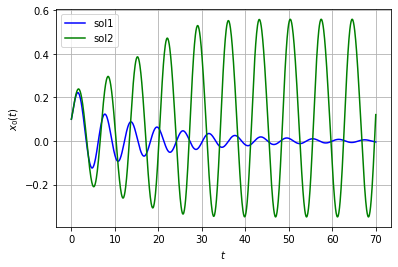

In [21]:
plt.plot(t, sol1[:, 0], 'b', label='sol1')
plt.plot(t, sol2[:, 0], 'g', label='sol2')
plt.legend(loc='best')
plt.xlabel('$t$')
plt.ylabel('$x_0(t)$')
plt.grid()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()